# <center><font color='Black' face='comic sans ms'>Name:Nikhil Shetty</font></center>
# <font color='Black' face='comic sans ms'>Corse Code:DST10923</font>

# <center><font color='Blac' face='comic sans ms'>Real Estate Price Prediction For Banglore</font></center>
<b>Problem on Hand: </b> This data science project series walks through step by step process of how to build a real estate price prediction website. We will first build a model using sklearn and linear regression using banglore home prices dataset from kaggle.com.During model building we will cover almost all data science concepts such as data load and cleaning, outlier detection and removal, feature engineering, dimensionality reduction, gridsearchcv for hyperparameter tunning etc.</b>

# Outline
1. Import Datasets
2. Data Cleaning and Data Preparation
3. Exploratory Data Analysis
4. Feature Engineering
5. Train Test Split
6. Model Building
7. Model Evaluation

In [60]:
# Import Libraries for Analysis
import pandas as pd
import numpy as np


# Import Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## <font color='yellow' face='Cursive'> Importing the data set </font>

<b> The data set is in csv format and can be imported using [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method available in pandas library. Since this is original copy giving it a relevent name when importing. <br><br> </b>

Also we will be checking whether the data set is correctly imported by checking the top5 rows of data set

In [61]:
# Import the data set
real_org = pd.read_csv("Bengaluru_House_Data.csv")

# Print top 5 rows of dataset
real_org.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## <font color='yellow' face='Cursive'> Data Cleaning and Preparation</font>

In [62]:
# Check the info of data set
real_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


- <font>There are 13320 rows in the data set</font>
- <font >There are 9 columns in the data set provided</font>
- <font > All the columns are of Object or Float type .</font>

In [63]:
# Create a copy of data set
real_cpy = real_org.copy()

In [64]:
# Check column names
real_cpy.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [65]:
# Remove leading and trailing edges
real_cpy.columns = real_cpy.columns.str.strip()

# print coloumns after stripping spaces
print("Removing leading and trailing spaces: ",  real_cpy.columns)

Removing leading and trailing spaces:  Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [66]:
# Check Null Values in data set
real_cpy.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<font color = 'Blue'> Most of the null values are in  society and balcony  Columns.Around 40% and 4% of the total rows the society and balcony are null value.</font>
<br>
<font color = 'Brown'>Also for build the model it would be difficult to consider all the fecture.Thus we should remove the column that are not useful.</font>

In [67]:
#Droping the column

real_cpy=real_cpy.drop(['society','balcony'],axis='columns')
real_cpy.head(5)

,area_type,availability,location,size,total_sqft,bath,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


#Counting the unique value of each column and taking the required step for it.

For Area type:

In [68]:
print("Area type:",len(real_cpy['area_type'].unique()))
real_cpy['area_type'].value_counts()

Area type: 4


Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

<font color = 'Blue'> Since major rows are for Super build-up Area but it might effect the model buiding also it might not the critical fecture for prediction for the house as location would be sufficient.</font>
<br>
<font color = 'Brown'>So we are removing the column.</font>

In [69]:
#Droping the column
real_cpy=real_cpy.drop(['area_type'],axis='columns')

#Droping the null rows
real_cpy=real_cpy.dropna()

For Availability:


In [70]:
print("Availability:",len(real_cpy['availability'].unique()))
real_cpy['availability'].value_counts()

Availability: 80


Ready To Move    10564
18-Dec             297
18-May             291
18-Apr             269
18-Aug             200
                 ...  
15-Dec               1
20-Feb               1
16-Jul               1
14-Nov               1
14-Jul               1
Name: availability, Length: 80, dtype: int64

<font color = 'Blue'> Since major rows are for Ready to Move, it might not the critical fecture for prediction for the houset.</font>
<br>
<font color = 'Brown'>So we are removing the column.</font>

In [71]:
#Droping the column
real_cpy=real_cpy.drop(['availability'],axis='columns')

For Location:

In [72]:
real_cpy.location=real_cpy.location.apply(lambda x: x.strip())
print("Location:",len(real_cpy['location'].unique()))
real_cpy['location'].value_counts()

Location: 1293


Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

<font color = 'Blue'>There are more 1000 location it would difficult to consider all the location but we can consider the location as other for the location which are less.</font>
<br>
<font color = 'Brown'>So we should modify the location .</font>

In [73]:
locations=real_cpy.groupby('location')['location'].agg('count').sort_values(ascending=False)
len(locations[locations>=15])

186

<font color = 'Blue'>Now there are 187 unique location including other.Now create other location as other</font>

In [74]:
# renaming the location which are less than 15 occurrence
location_other=locations[locations<=15]
real_cpy.location=real_cpy.location.apply(lambda x: "Other" if x in location_other else x)
real_cpy

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Other,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


For Size:

In [75]:
print("Size:",len(real_cpy['size'].unique()))
real_cpy['size'].value_counts()

Size: 31


2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

<font color = 'Blue'>It is consider Bhk and Bedroom as different entries.</font>
<br>
<font color = 'Brown'>We are converting it to single value int.</font>

In [76]:
real_cpy['size']=real_cpy['size'].apply(lambda x: int(x.split(" ")[0]))
real_cpy

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,231.00
13316,Other,4,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,60.00
13318,Padmanabhanagar,4,4689,4.0,488.00


For Total Sqft:

In [77]:
print("Total sqft:",len(real_cpy['total_sqft'].unique()))
real_cpy['total_sqft'].value_counts()

Total sqft: 2067


1200    843
1100    221
1500    204
2400    195
600     180
       ... 
5985      1
3580      1
2461      1
1437      1
4689      1
Name: total_sqft, Length: 2067, dtype: int64

In [78]:
real_cpy['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

This contain range value.

<font color = 'Blue'>While converte to float it throw error as it contain range also in the dataset there value which contain different unit system.</font>
<br>
<font color = 'Brown'>We will take the mean value for the range input.</font>

In [79]:
def range_to_float(x):
  y=x.split("-")
  if len(y)==2:
    return (float(y[0])+float(y[1]))/2 #we are taking mean value
  else:
    try:
      return float(x)
    except:
      # There a lot different unit system we are ignoring them
      return
real_cpy['total_sqft']=real_cpy['total_sqft'].apply(range_to_float)
real_cpy['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

For Bathroom:

In [80]:
print("Bathroom:",len(real_cpy['bath'].unique()))
real_cpy['bath'].value_counts()
real_cpy['bath'].unique()

Bathroom: 19


array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

<font color = 'Blue'>It contain float value </font>

For Price:

In [81]:
print("Price:",len(real_cpy['price'].unique()))
real_cpy['price'].value_counts()

Price: 1955


75.00     310
65.00     302
55.00     275
60.00     270
45.00     240
         ... 
243.00      1
48.24       1
37.95       1
52.66       1
488.00      1
Name: price, Length: 1955, dtype: int64

In [82]:
#drop the remaining null value
real_cpy=real_cpy.dropna()
real_cpy.isnull().sum()


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

# Dealing with outliers

<font color = 'Blue'>Using domain knowledge.</font><br>
<font>Min sqft for each bedroom would be more than 100 or 150 sqf.t</font><br>
<font>Bathroom can't be more than bedroom.</font>

In [83]:
real_cpy=real_cpy[real_cpy['total_sqft']/real_cpy['size']>200]
real_cpy.shape

(12754, 5)

Bathroom can't be more than bedroon by large number in general

In [84]:
real_cpy=real_cpy[real_cpy['bath']<real_cpy['size']+2]
real_cpy.shape

(12592, 5)

<font color = 'Red'> The last step to treat Outlier is by using  Standard Deviation Method </font>

In [85]:
# Create new column as per_sqft_price
real_samp=real_cpy
real_samp['per_sqft_price']=real_samp['price']*100000/real_samp['total_sqft']
real_samp

,location,size,total_sqft,bath,price,per_sqft_price
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,6689.834926
13316,Other,4,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


<font color = 'Blue'>For Same location the per Sqft would not be differ a lot</font>
<br>
<font color = 'Brown'>We can use the Mean & Standart Deviation for delining with outlier.</font>

In [86]:
def rem_outlier(df):
  samp=pd.DataFrame()
  for key,data in df.groupby('location'):
    mean=np.mean(data.per_sqft_price)
    std=np.std(data.per_sqft_price)
    rem=data[(data.per_sqft_price>(mean-std)) &(data.per_sqft_price<=(mean+std))]
    samp=pd.concat([samp,rem],ignore_index=True)
  return samp

real_samp=rem_outlier(real_samp)
real_samp.shape

(10516, 6)

<font color = 'Red'> The last thing left in Data Preparation  So lets create [Box plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) for Annual Salary and check for Outliers </font>

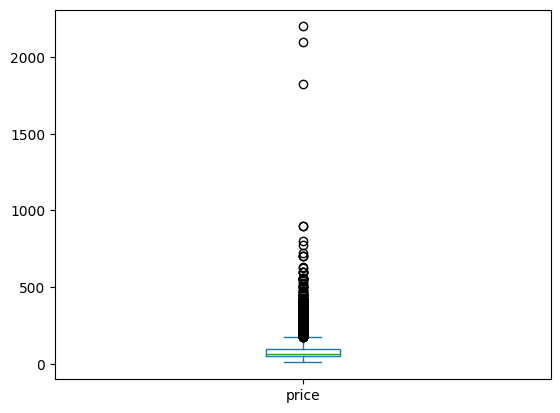

In [87]:
# Create Box Plot for price
real_samp.price.plot.box()
plt.show()

- <font color = 'Blue'> There are few price which are way far from other prices.</font>
- <font color = 'Blue'> They might effect the prediction. So we have to eliminate them</font><br><br>

<font color = 'Brown'> Lets Check the Summary Statistics as well </font>

In [88]:
# SUMMARY STATS OF Price
real_samp.price.describe()

count    10516.00000
mean        87.90230
std         76.79541
min          8.00000
25%         48.41500
50%         66.00000
75%         99.17000
max       2200.00000
Name: price, dtype: float64

As can be seen The max value way more than mean , median .

<font color = 'Brown'> Let's delete rows whose Price> 500L according to box plot</font>

In [89]:
real_samp= real_samp[real_samp['price']<500]
real_samp.shape

(10482, 6)

## <font color='yellow' face='Cursive'>Exploratory Data Analysis</font>

#Location as Per SQFT Price

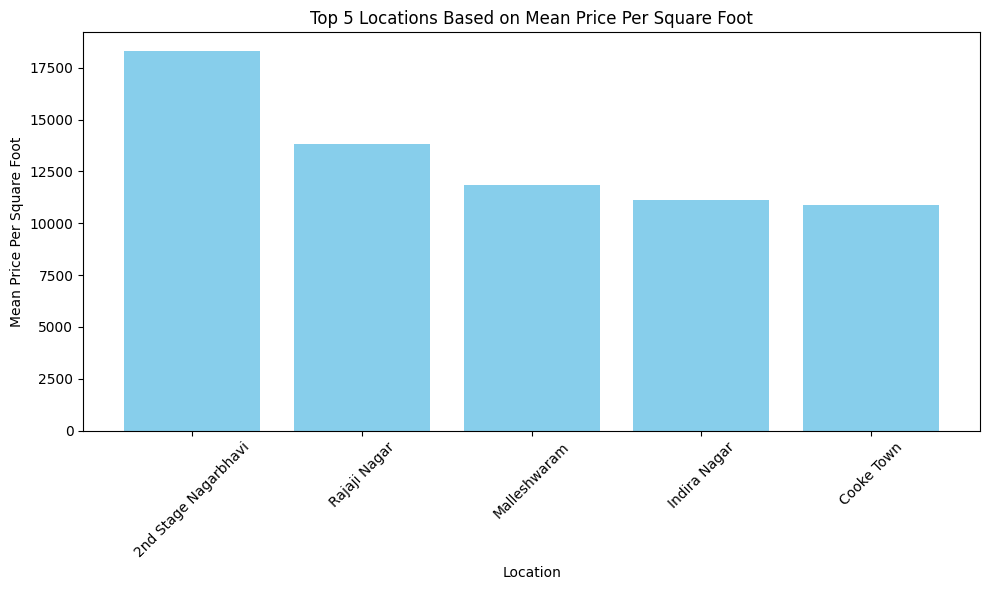

In [90]:

# Calculate mean price per square foot for each location
mean_price_per_sqft = real_samp.groupby('location')['per_sqft_price'].mean().reset_index()
mean_price_per_sqft = mean_price_per_sqft.nlargest(5, 'per_sqft_price')

# Plotting the top 5 locations based on mean price per square foot
plt.figure(figsize=(10, 6))
plt.bar(mean_price_per_sqft['location'], mean_price_per_sqft['per_sqft_price'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Mean Price Per Square Foot')
plt.title('Top 5 Locations Based on Mean Price Per Square Foot')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

This are top Expencive Area

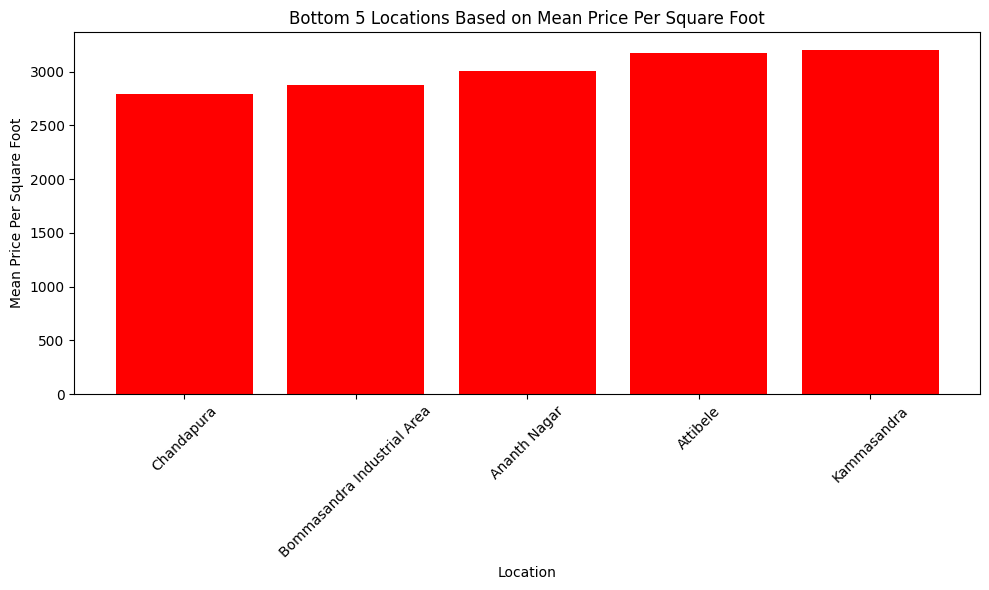

In [91]:
# Calculate mean price per square foot for each location
mean_price_per_sqft = real_samp.groupby('location')['per_sqft_price'].mean().reset_index()
mean_price_per_sqft = mean_price_per_sqft.nsmallest(5, 'per_sqft_price')

# Plotting the bottom 5 locations based on mean price per square foot
plt.figure(figsize=(10, 6))
plt.bar(mean_price_per_sqft['location'], mean_price_per_sqft['per_sqft_price'], color='red')
plt.xlabel('Location')
plt.ylabel('Mean Price Per Square Foot')
plt.title('Bottom 5 Locations Based on Mean Price Per Square Foot')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

This are the cheapest location

#Price Distribution

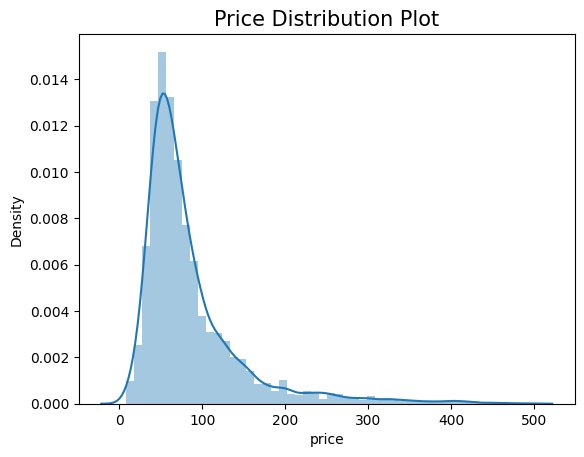

In [92]:
# Check distribution of Target Variable
sns.distplot(real_samp.price)
plt.title("Price Distribution Plot",fontsize=15)
plt.show()

##### <font color = 'Red'> Lets check if there is any relation between any of the Numerical variables using [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html)</font>

<Figure size 1500x2000 with 0 Axes>

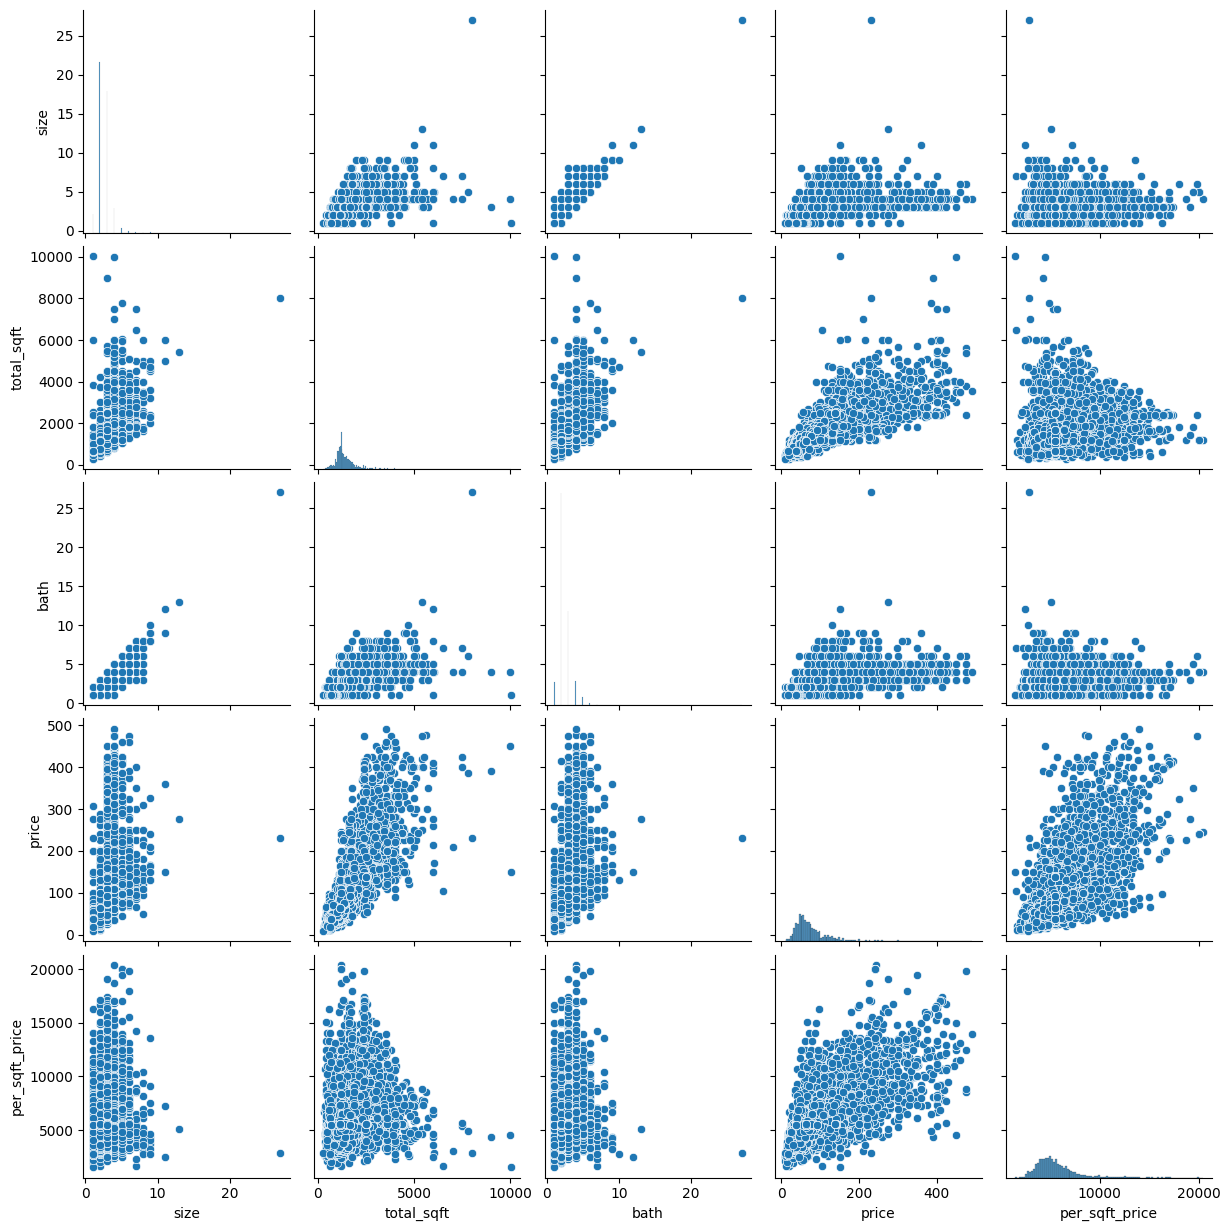

In [93]:
# Plot a pair plot
plt.figure(figsize=(15,20))
sns.pairplot(real_samp)
plt.show()

Nothing seems to have any [correlation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). Lets visualize correlation coefficients using [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

<Axes: >

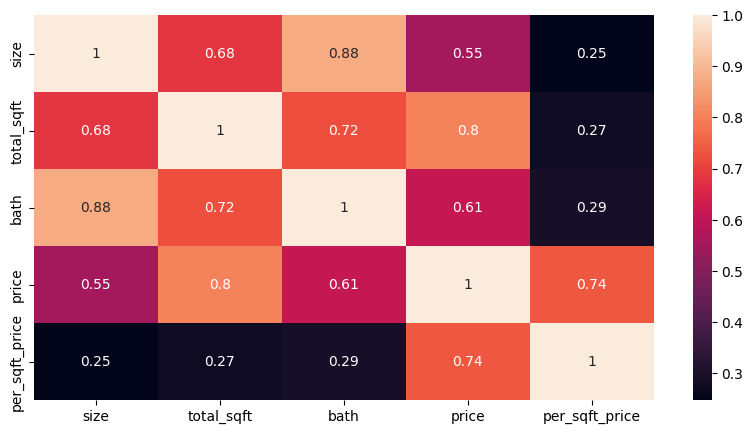

In [94]:
# Plot a heatMap
plt.figure(figsize=(10,5))
sns.heatmap(real_samp.corr(),annot=True)

There multiple fecture are related to each other as house price defer to many fecture.

## <font color='yellow' face='Cursive'>Feature Engineering</font>

In [95]:
#  per_sqft_price is not required drop the column
real_samp=real_samp.drop('per_sqft_price',axis='columns')

In [96]:
#new dataframe for numberical value of location
loc_value=pd.DataFrame()
loc_value['names']=real_samp['location']

In [97]:
locations_value

,names
0,145.7250
1,145.7250
2,145.7250
3,145.7250
4,145.7250
...,...
10511,93.7246
10512,93.7246
10513,93.7246
10514,93.7246


 &nbsp; <font color='green' face='cursive'> Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called [feature encoding](https://medium.com/analytics-vidhya/different-type-of-feature-engineering-encoding-techniques-for-categorical-variable-encoding-214363a016fb). </font>


   <font color='Green' face='cursive'>Here We will be using Mean encoding. We are using Target encoding as the number of labels of categorical variables are very high and so using others might either create unnecessary variables or labelling might not be that appropriate.</font>

In [102]:
# Apply target encoding for Job Title
mean_location = real_samp.groupby('location')['price'].mean()
real_samp['location'] = real_samp['location'].map(mean_location)

loc_value=pd.concat([loc_value,real_samp['location']],axis=1)
# For last train the model
X=real_samp.drop(['price'],axis='columns')
y=real_samp['price']

In [104]:
#drop duplicates
loc_value = loc_value.drop_duplicates()
loc_value

,names,location
0,1st Phase JP Nagar,145.725000
20,2nd Stage Nagarbhavi,232.750000
32,5th Phase JP Nagar,67.762500
64,6th Phase JP Nagar,115.733333
79,7th Phase JP Nagar,93.361683
...,...,...
9739,Whitefield,92.762779
10215,Yelachenahalli,78.730769
10228,Yelahanka,72.660084
10407,Yelahanka New Town,54.808824


In [105]:
#Check the data set
X

,location,size,total_sqft,bath
0,145.7250,4,2825.0,4.0
1,145.7250,3,1875.0,3.0
2,145.7250,5,1500.0,5.0
3,145.7250,3,2065.0,4.0
4,145.7250,3,2024.0,3.0
...,...,...,...,...
10511,93.7246,3,1676.0,3.0
10512,93.7246,3,2503.0,3.0
10513,93.7246,3,1855.0,3.0
10514,93.7246,3,1876.0,3.0


## <font color='yellow' face='Cursive'>Train Test Split</font>

#### Split data into train and test set using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [106]:
# Import libraries for train test split
from sklearn.model_selection import train_test_split

In [107]:
# Split data into train and test sets

real_train, real_test = train_test_split(real_samp,train_size=0.8, random_state=42)

 Check sizes of data to know whether they are split correctly

In [108]:
# Shape of train set
print(real_train.shape)

# Shape of test set
print(real_test.shape)


(8385, 5)
(2097, 5)


#### <font color='Brown'> Seperate Dependent and Independent Variables using [pop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pop.html)</font>

In [109]:
# Divide tarin set into Dependent and independent variables
y_train = real_train.pop('price')

X_train = real_train


# Divide test set into Dependent and independent variables
y_test = real_test.pop('price')

X_test = real_test

### <font color='#5234' face='Cursive'> Scaling</font>
 &nbsp; <font color='Green' face='cursive'>Scaling is a technique to standardize the independent features present in the data in a fixed range. We do this to make sure all the features are in same scale.</font>

#### Here we will be using  [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) function of sklearn

In [110]:
# import Ilbrary for Scaling
from sklearn.preprocessing import StandardScaler

In [111]:
# Scale the train
scaler = StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

X_train.describe()

,location,size,total_sqft,bath
count,8.385000e+03,8.385000e+03,8.385000e+03,8.385000e+03
mean,-1.506249e-16,-1.963844e-16,3.080290e-16,1.127039e-16
std,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00
min,-1.782055e+00,-1.669080e+00,-1.717299e+00,-1.500292e+00
25%,-7.127663e-01,-6.067423e-01,-5.199879e-01,-4.648201e-01
50%,2.212006e-01,-6.067423e-01,-2.808192e-01,-4.648201e-01
75%,2.864487e-01,4.555952e-01,2.430043e-01,5.706519e-01
max,5.728865e+00,2.595170e+01,1.258294e+01,2.542198e+01


In [112]:
#Scale the test
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

X_test.describe()

,location,size,total_sqft,bath
count,2097.000000,2097.000000,2097.000000,2097.000000
mean,0.029873,0.013335,0.009693,0.001809
std,1.064866,0.969470,0.974108,0.957211
min,-1.782055,-1.669080,-1.583775,-1.500292
25%,-0.680625,-0.606742,-0.493577,-0.464820
50%,0.221201,-0.606742,-0.233866,-0.464820
75%,0.286449,0.455595,0.228331,0.570652
max,5.602620,11.078970,8.870685,10.925372


#Using GridSearchCV to find the best model



In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit

def find_best_model_using_gridsearchcv(X, y):
    best_model_params1 = {}  # Store best model's parameters
    best_score = float('-inf')  # Initialize best score to negative infinity
    all_model_scores = []  # To store scores for all models

    # Dictionary containing different regression algorithms along with their hyperparameters for GridSearchCV
    algos = {
        'linear_regression': {
            'model': LinearRegression(),  # Linear Regression model
            'params': {
                'fit_intercept': [True, False],  # Hyperparameters to be tuned for Linear Regression
                'copy_X': [True, False],
                'n_jobs': [-1]
            }
        },
        'lasso': {
            'model': Lasso(),  # Lasso Regression model
            'params': {
                'alpha': [1, 2],  # Hyperparameters to be tuned for Lasso Regression
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),  # Decision Tree Regression model
            'params': {
                'criterion': ['mse', 'friedman_mse'],  # Hyperparameters to be tuned for Decision Tree Regression
                'splitter': ['best', 'random']
            }
        }
    }

    # Splitting the data using ShuffleSplit for cross-validation
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    # Loop through each regression algorithm and perform GridSearchCV for hyperparameter tuning
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)

        # Store model's information (best score and parameters) in model_info dictionary
        model_info = {
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        }
        all_model_scores.append(model_info)  # Append model's information to all_model_scores list

        # Update best_model_params if a better score is found
        if gs.best_score_ > best_score:
            best_model_params1['model'] = algo_name
            best_model_params1['best_score'] = gs.best_score_
            best_model_params1['best_params'] = gs.best_params_
            best_score = gs.best_score_

    # Print all model scores
    for model_info in all_model_scores:
        print(f"Model: {model_info['model']}, Best Score: {model_info['best_score']}, Best Params: {model_info['best_params']}")

    return best_model_params1  # Return best model's parameters


# Call the function and get the best model's parameters
best_params = find_best_model_using_gridsearchcv(X_train, y_train)

# Print the best model's information
print("\nBest Model:", best_params['model'])
print("Best Score:", best_params['best_score'])
print("Best Parameters:", best_params['best_params'])

Model: linear_regression, Best Score: 0.7408047476335147, Best Params: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}
Model: lasso, Best Score: 0.7395849294442156, Best Params: {'alpha': 1, 'selection': 'random'}
Model: decision_tree, Best Score: 0.7130875599731485, Best Params: {'criterion': 'friedman_mse', 'splitter': 'best'}

Best Model: linear_regression
Best Score: 0.7408047476335147
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}


#Using RandomizedSearchCV to find the best model

In [114]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit

def find_best_model_using_randomizedsearchcv(X, y):
    best_model_params = {}  # Store best model's parameters
    best_score = float('-inf')  # Initialize best score to negative infinity
    all_model_scores = []  # To store scores for all models

    # Dictionary containing different regression algorithms along with their hyperparameters for RandomizedSearchCV
    algos = {
        'linear_regression': {
            'model': LinearRegression(),  # Linear Regression model
            'params': {
                'fit_intercept': [True, False],  # Hyperparameters to be tuned for Linear Regression
                'copy_X': [True, False],
                'n_jobs': [-1]
            }
        },
        'lasso': {
            'model': Lasso(),  # Lasso Regression model
            'params': {
                'alpha': [1, 2],  # Hyperparameters to be tuned for Lasso Regression
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),  # Decision Tree Regression model
            'params': {
                'criterion': ['mse', 'friedman_mse'],  # Hyperparameters to be tuned for Decision Tree Regression
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),  # Random Forest Regression model
            'params': {
                'n_estimators': [100, 200, 300],  # Hyperparameters to be tuned for Random Forest Regression
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        }
    }

    # Splitting the data using ShuffleSplit for cross-validation
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    # Loop through each regression algorithm and perform RandomizedSearchCV for hyperparameter tuning
    for algo_name, config in algos.items():
        rs = RandomizedSearchCV(config['model'], config['params'], cv=cv, n_iter=10, random_state=0, return_train_score=False)
        rs.fit(X, y)

        # Store model's information (best score and parameters) in model_info dictionary
        model_info = {
            'model': algo_name,
            'best_score': rs.best_score_,
            'best_params': rs.best_params_
        }
        all_model_scores.append(model_info)  # Append model's information to all_model_scores list

        # Update best_model_params if a better score is found
        if rs.best_score_ > best_score:
            best_model_params['model'] = algo_name
            best_model_params['best_score'] = rs.best_score_
            best_model_params['best_params'] = rs.best_params_
            best_score = rs.best_score_

    # Print all model scores
    for model_info in all_model_scores:
        print(f"Model: {model_info['model']}, Best Score: {model_info['best_score']}, Best Params: {model_info['best_params']}")

    return best_model_params  # Return best model's parameters


# Call the function and get the best model's parameters
best_params = find_best_model_using_randomizedsearchcv(X_train, y_train)

# Print the best model's information
print("\nBest Model:", best_params['model'])
print("Best Score:", best_params['best_score'])
print("Best Parameters:", best_params['best_params'])


Model: linear_regression, Best Score: 0.7408047476335147, Best Params: {'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}
Model: lasso, Best Score: 0.7397545224761422, Best Params: {'selection': 'random', 'alpha': 1}
Model: decision_tree, Best Score: 0.719567944813374, Best Params: {'splitter': 'best', 'criterion': 'friedman_mse'}
Model: random_forest, Best Score: 0.8164962980606998, Best Params: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}

Best Model: random_forest
Best Score: 0.8164962980606998
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}


From All the Model Random Forest  have the best Score.
Now Check For Overfitting Issue We are Using Residual as the parameter.

In [115]:
best_model_name = best_params['model']
best_model_params = best_params['best_params']

if best_model_name == 'random_forest':
    best_model = RandomForestRegressor(**best_model_params)
else:
    raise ValueError("The best model is not Random Forest")

# Fit the best Random Forest model on the entire training data
best_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=10,
                      n_estimators=200)

Test MSE: 715.0636339559211
Test R-squared: 0.8082308770799342


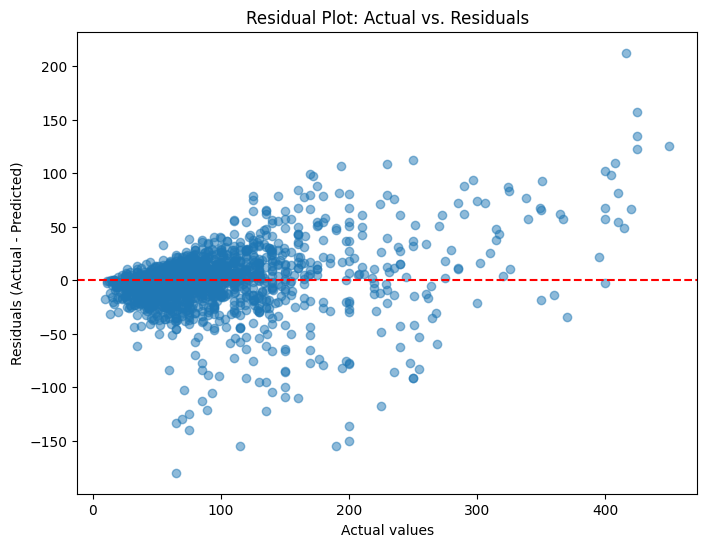

In [116]:
from sklearn.metrics import mean_squared_error, r2_score


# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate residuals (difference between actual and predicted values)
residuals = y_test - y_pred

# Calculate evaluation metrics: MSE and R-squared
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {test_mse}")
print(f"Test R-squared: {test_r2}")

# Plot residuals against actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel("Actual values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot: Actual vs. Residuals")
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

From This We can say that the Model is not best but it good enough to prediction.Now we will Train to whole dataset

In [117]:
best_hyperparameters = best_params['best_params']

# Instantiate the RandomForestRegressor with the best hyperparameters
final_model = RandomForestRegressor(**best_hyperparameters)

# Train the final model on the entire combined dataset (X_combined, y_combined)
final_model.fit(X, y)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=10,
                      n_estimators=200)

#Implemenation of Model

In [123]:
def predict():
 total_sqft=float(input("Enter the Total Sqft:"))
 bhk=float(input("Enter the BHK:"))
 bath=float(input("Enter th Bathroom:"))
 location=input("Enter the Location:")
 if location in loc_value['names'].values:
  value = loc_value.loc[loc_value['names'] == location, 'location'].values[0]
        # Assuming 'final_model' expects a 2D array-like input
  prediction = final_model.predict([[value, bhk, total_sqft, bath]])
  return prediction[0]  # Return the prediction value
 else:
  return "Location not found in data  or it will in other location"  # Handle case when location is not found

# Call the predict function
result = predict()
print("Predicted result:", result)

Enter the Total Sqft:2000
Enter the BHK:3
Enter th Bathroom:3
Enter the Location:Hennur Road
Predicted result: 110.51184127317634
